# Pokemon

This dataset has been released [on Kaggle](https://www.kaggle.com/abcsds/pokemon/version/2#) in the public domain.

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from umap import UMAP

import matplotlib.pyplot as plt

from kprototypes import KPrototypes, CategoricalTransformer

In [2]:
# Load dataset
pokemon_df = pd.read_csv("../data/pokemon.csv")
pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
# Distinguish between categorical and numerical features
categorical_columns = ["Type 1", "Type 2", "Legendary"]
numerical_columns = [
    "Total",
    "HP",
    "Attack",
    "Defense",
    "Sp. Atk",
    "Sp. Def",
    "Speed",
    "Generation",
]

In [4]:
# Normalize numerical features
numerical_transformer = StandardScaler()
numerical_values = numerical_transformer.fit_transform(
    pokemon_df[numerical_columns].values
)

# Encode categorical features
categorical_transformer = CategoricalTransformer()
categorical_values = categorical_transformer.fit_transform(
    pokemon_df[categorical_columns].values
)

In [5]:
# Instanciate model
model = KPrototypes(
    n_clusters=8,
    initialization="frequency",
    numerical_distance="manhattan",
    categorical_distance="matching",
    gamma=None,
    n_iterations=100,
    random_state=None,
    verbose=1,
)

# Fit dataset
clustership = model.fit_predict(numerical_values, categorical_values)

#1: cost=4327.337127468367, moves=182
#2: cost=4027.4045066926587, moves=116
#3: cost=3925.71205721559, moves=78
#4: cost=3869.273316468114, moves=50
#5: cost=3849.7032272489505, moves=37
#6: cost=3828.489891402201, moves=29
#7: cost=3819.4640759928384, moves=33
#8: cost=3816.075756407123, moves=24
#9: cost=3810.6827218708045, moves=20
#10: cost=3806.2887575073037, moves=15
#11: cost=3803.392049023034, moves=12
#12: cost=3799.184214423502, moves=16
#13: cost=3794.4005156741364, moves=10
#14: cost=3794.0776811846986, moves=5
#15: cost=3794.890776796726, moves=0


In [6]:
# Number of points per cluster
np.bincount(clustership)

array([267,   2,  52,  91,  99,  87, 141,  61], dtype=int64)

In [7]:
# Project in 2D plane
umap = UMAP(verbose=True)
projection = umap.fit_transform(np.hstack([numerical_values, categorical_values]))

UMAP( verbose=True)
Sat Mar 30 23:48:15 2024 Construct fuzzy simplicial set
Sat Mar 30 23:48:16 2024 Finding Nearest Neighbors
Sat Mar 30 23:48:23 2024 Finished Nearest Neighbor Search
Sat Mar 30 23:48:31 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Mar 30 23:48:38 2024 Finished embedding


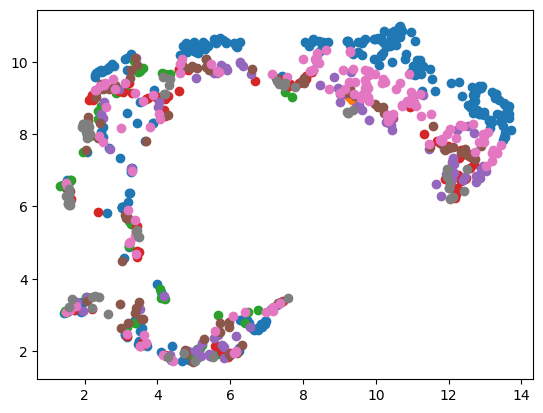

In [8]:
# Show assignment
for k in range(model.n_clusters):
    mask = clustership == k
    plt.scatter(projection[mask, 0], projection[mask, 1])

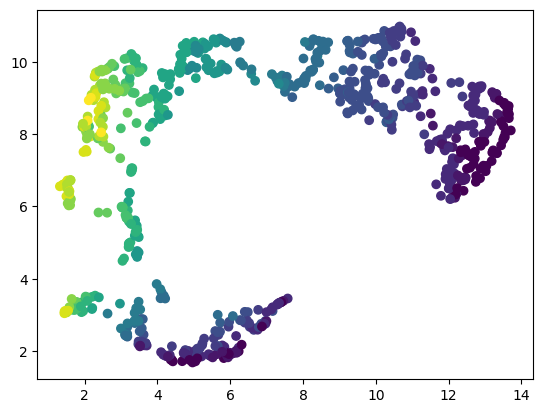

In [9]:
# Show primary type
plt.scatter(projection[:, 0], projection[:, 1], c=categorical_values[:, 0])

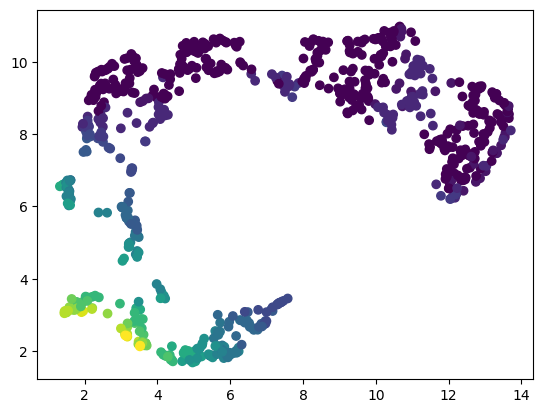

In [10]:
# Show secondary type
plt.scatter(projection[:, 0], projection[:, 1], c=categorical_values[:, 1])

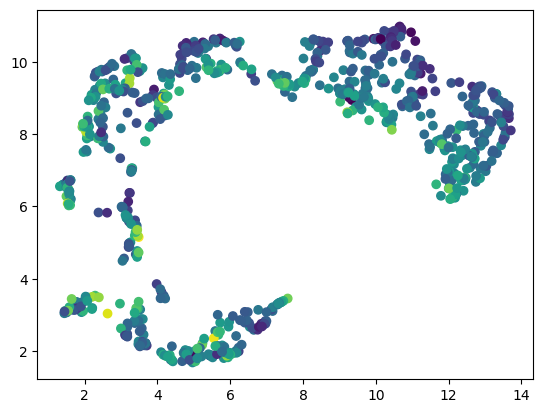

In [11]:
plt.scatter(projection[:, 0], projection[:, 1], c=pokemon_df["Attack"])